*Autores: Alex H. Pfoccori Quispe, Milton A. Mozo Davila*

# Regresión Lineal

## Librerías
La función *library()* es usado para cargar *librerías*, o grupos de funciones y conjunto de datos que no están incluidos en el nucleo de la distribución de R.
En esta guía cargaremos el paquete *MASS* y *ISLR*

In [1]:
library(MASS)
library(ISLR)

## Regresión Lineal Simple
La librería *MASS* contiene un conjunto de datos de *Boston*, el cual almacena *medv* (valor medio de una casa) para 506 vecinos alrededor de Boston.
Usaremos 13 predictores como *rm* (número promedio de habitaciones por casa), *age* (promedio de edad de las casas) y *lstat* (el porcentaje de dueños con bajo estatus socioeconómicos).

In [2]:
fix(Boston)
names(Boston)

[1] "crim"    "zn"      "indus"   "chas"    "nox"     "rm"      "age"    
 [8] "dis"     "rad"     "tax"     "ptratio" "black"   "lstat"   "medv"

Para crear un modelo de regresión lineal simple usamos la función *lm()*, con *medv* como respuesta y *lstat* como la predicción. La sintaxis básica es *lm(y~x,data)*. 

In [3]:
lm.fit = lm(medv~lstat, data = Boston)
attach(Boston)
lm.fit = lm(medv~lstat)

Podemos escribir *lm.fit*, esto nos mostrará información básica acerca de la salida de modelo. Para mayor información podemos usar *summary(lm.fit)*. Esto nos dará los valores y los standard errors para los coeficientes.

In [4]:
lm.fit


Call:
lm(formula = medv ~ lstat)

Coefficients:
(Intercept)        lstat  
      34.55        -0.95  


In [5]:
summary(lm.fit)


Call:
lm(formula = medv ~ lstat)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.168  -3.990  -1.318   2.034  24.500 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 34.55384    0.56263   61.41   <2e-16 ***
lstat       -0.95005    0.03873  -24.53   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.216 on 504 degrees of freedom
Multiple R-squared:  0.5441,	Adjusted R-squared:  0.5432 
F-statistic: 601.6 on 1 and 504 DF,  p-value: < 2.2e-16


Podemos usar la función *names()* para encontrar que otras piezas de información estan almacenados en *lm.fit*. Sin embargo, podemos extraer estos valores por su nombre, por ejemplo *lm.fit$coefficinets*.

In [6]:
names(lm.fit)

[1] "coefficients"  "residuals"     "effects"       "rank"         
 [5] "fitted.values" "assign"        "qr"            "df.residual"  
 [9] "xlevels"       "call"          "terms"         "model"

In [7]:
coef(lm.fit)

(Intercept)       lstat 
 34.5538409  -0.9500494

Para obtener un intervalo confidencial para los coeficientes estimados, podemos usar el comando *confint()*.

In [8]:
confint(lm.fit)

,2.5 %,97.5 %
(Intercept),33.448457,35.6592247
lstat,-1.026148,-0.8739505


La función *predict()* puede ser usado para producir intervalos confidenciales e intervalos predictivos para la predicción de *medv* para dar valores a *lstat*.

In [9]:
predict(lm.fit, data.frame(lstat = (c(5,10,15))), interval = "confidence")

,fit,lwr,upr
1,29.80359,29.00741,30.59978
2,25.05335,24.47413,25.63256
3,20.30310,19.73159,20.87461


In [10]:
predict(lm.fit, data.frame(lstat = (c(5,10,15))), interval = "prediction")

,fit,lwr,upr
1,29.80359,17.565675,42.04151
2,25.05335,12.827626,37.27907
3,20.30310,8.077742,32.52846


Ahora plotearemos *medv* y *lstat* a lo largo de la regresión simple de mínimos cuadrados usando las funciones *plot()* y *abline()*.

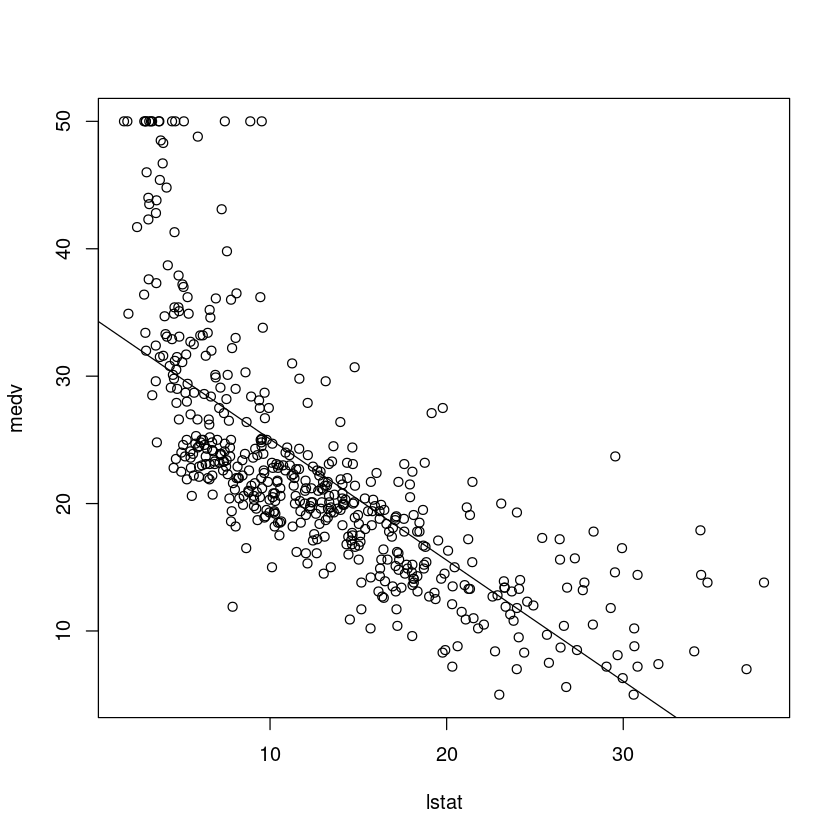

In [11]:
plot(lstat, medv)
abline(lm.fit)

En la gráfica anterior se evidencia que los datos no tienen un comportamiento lineal.
La función *abline()* puede ser usado para dibujar cualquier línea, no solo una líne a que represente una regresión simple de mínimos cuadrados. Para dibujar una línea en la itercepción *a* y el sltop *b*, podemos escribir *abline(a,b)*.

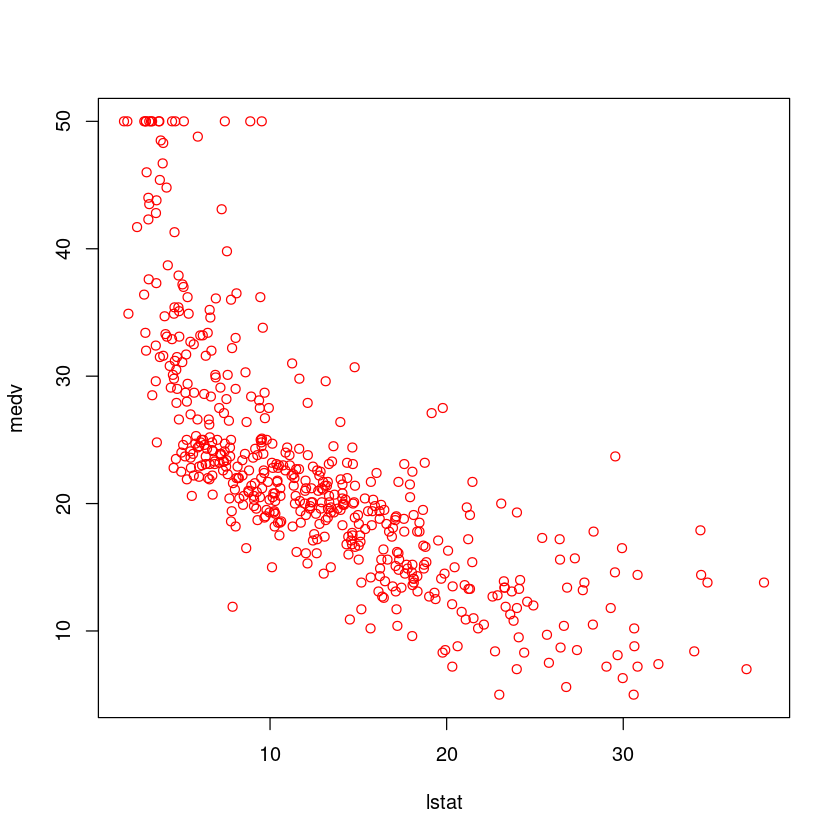

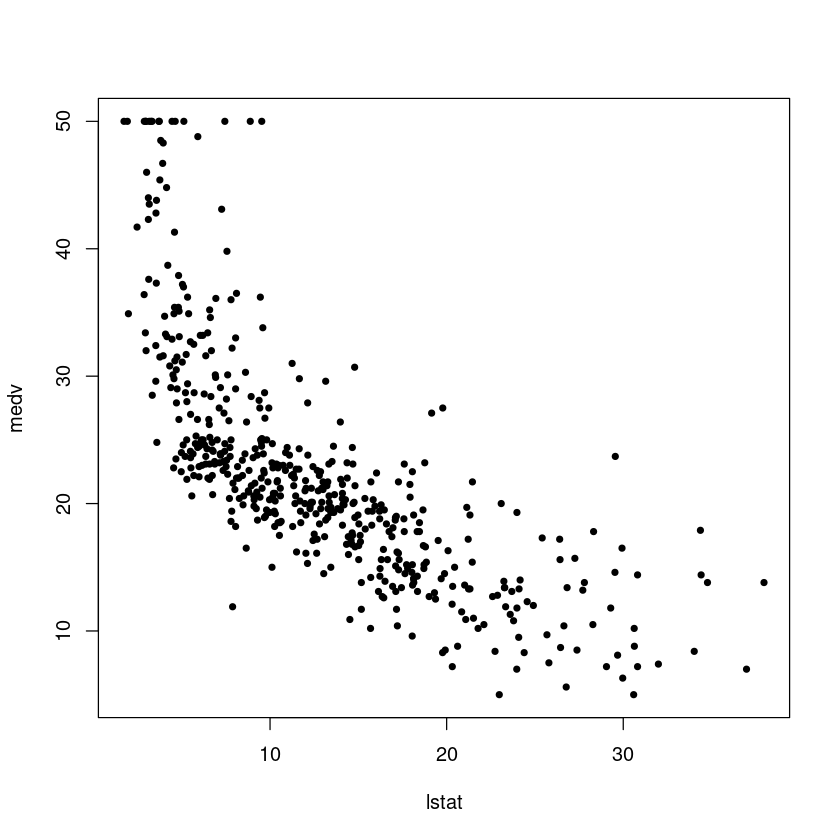

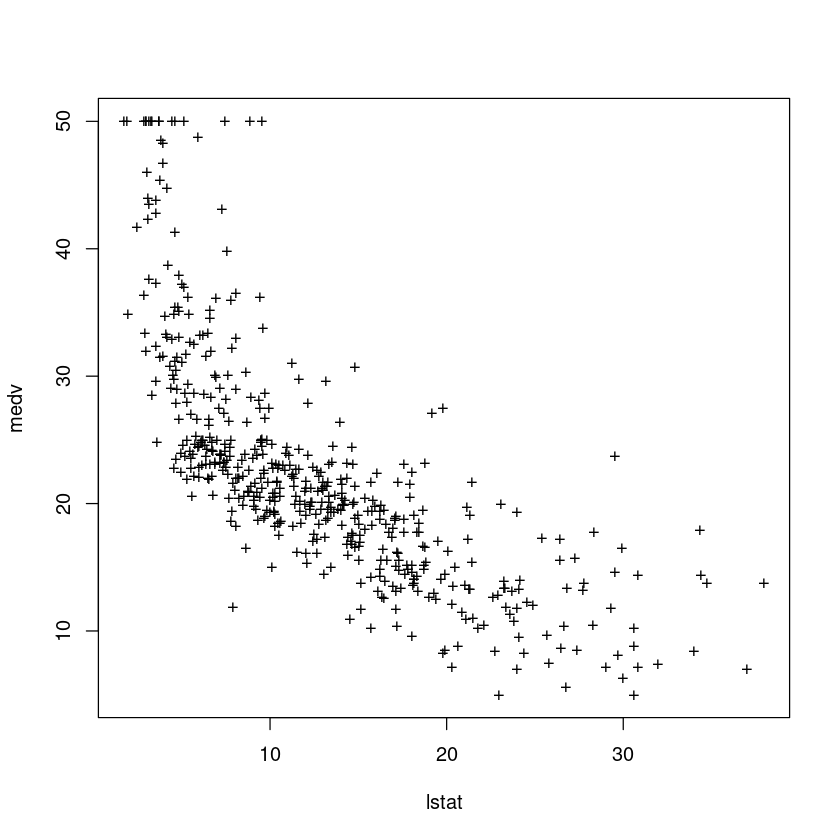

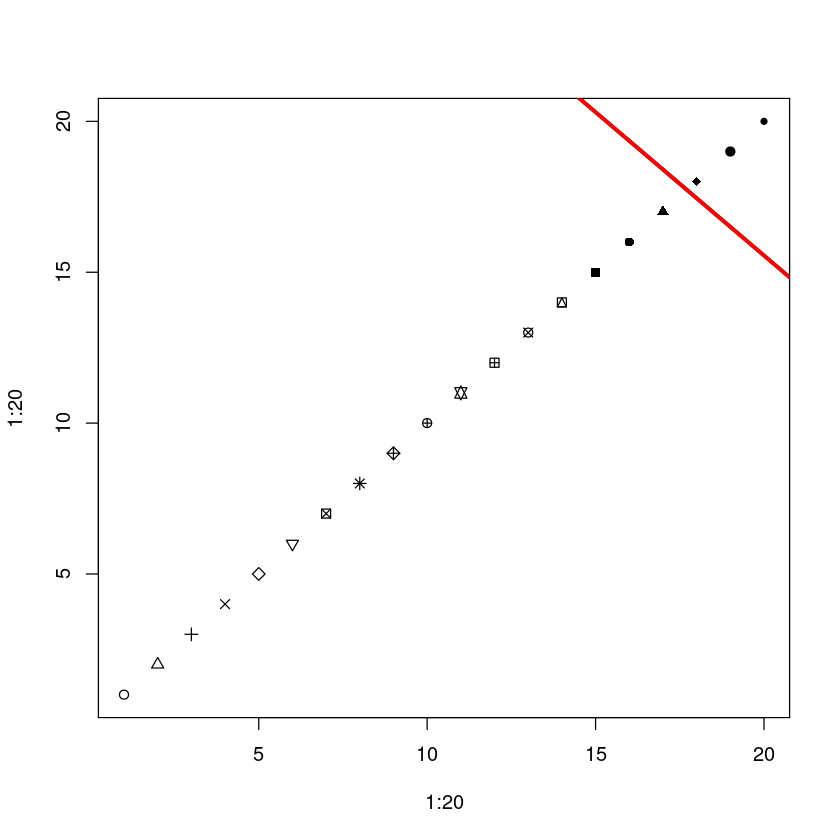

In [13]:
plot(lstat, medv, col = "red")
plot(lstat, medv, pch = 20)
plot(lstat, medv, pch = "+")
plot(1:20, 1:20, pch = 1:20)
abline(lm.fit, lwd = 3)
abline(lm.fit, lwd = 3, col = "red")

Los anteriores comandos generan gráficas de forma separada. Sin embargo, podemos lograr lo mismo usando la función *par()*, el cual le indica a R que genere ventanas flotantes por separado.

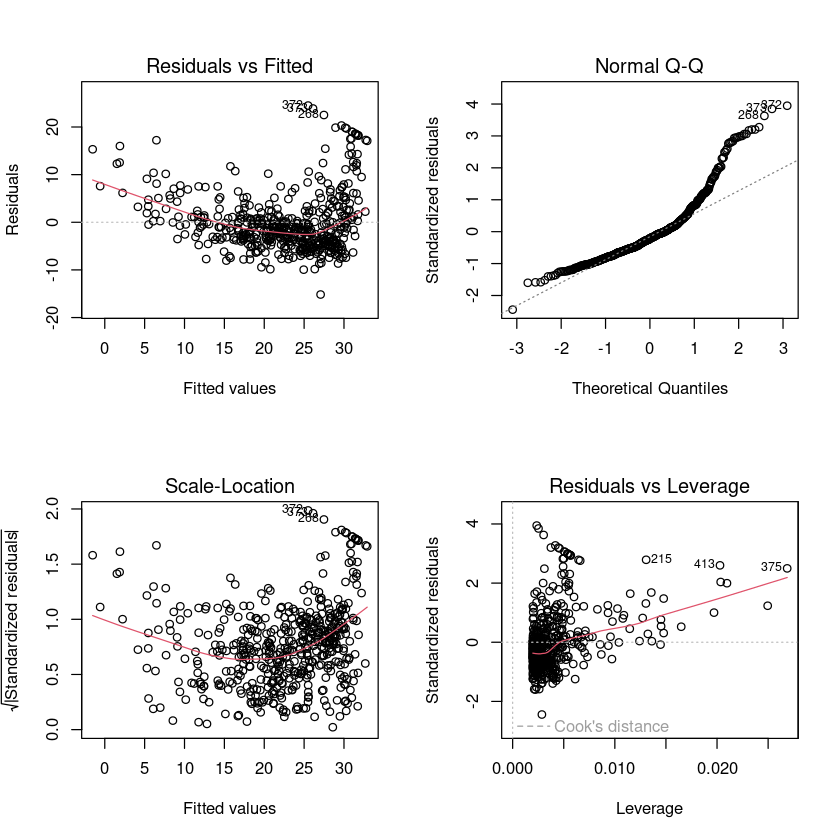

In [14]:
par(mfrow = c(2,2))
plot(lm.fit)

Alternativamente, podemos calcular los residuos desde la regresión lineal usando la función *residuals()*. La función *rstudent()* retornará los residuos estudiados y esto lo podemos graficar.

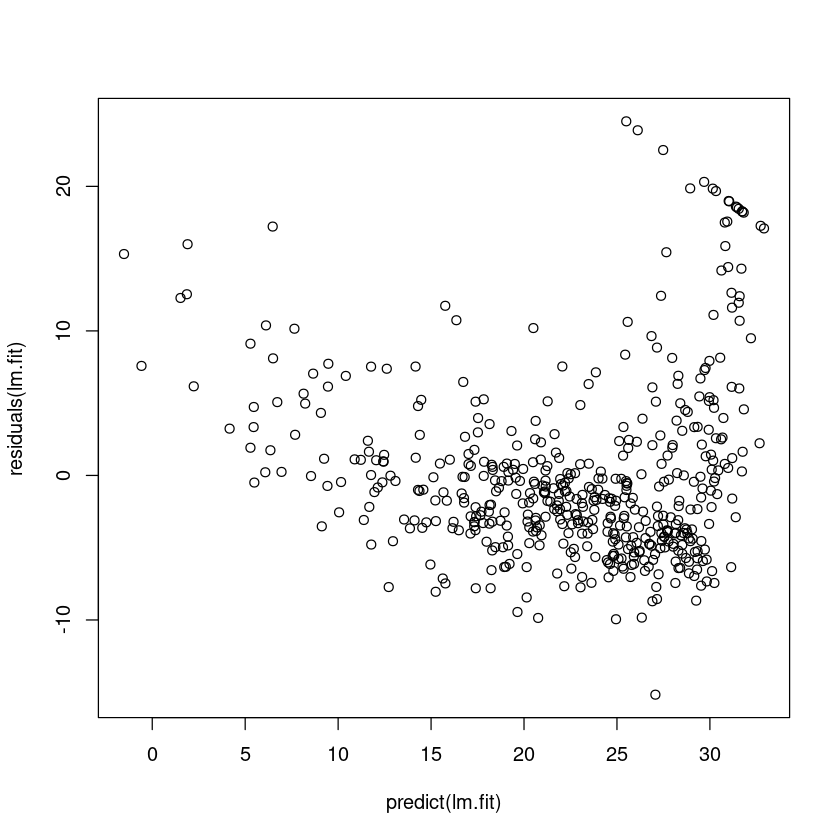

In [15]:
plot(predict(lm.fit), residuals(lm.fit))

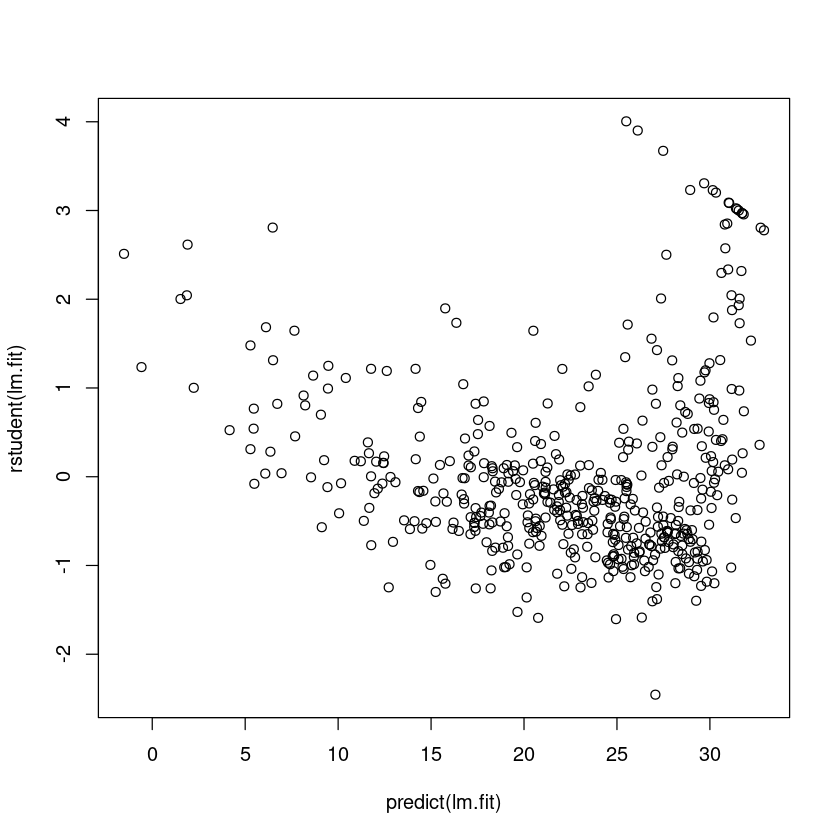

In [16]:
plot(predict(lm.fit), rstudent(lm.fit))

En la base de la impresión de residuals, hay alguna evidencia de la estadística de Leverage no-lineal que puede ser calculado por cualquier número de predicciones unsando la función *hatvalues()*.

375 
375

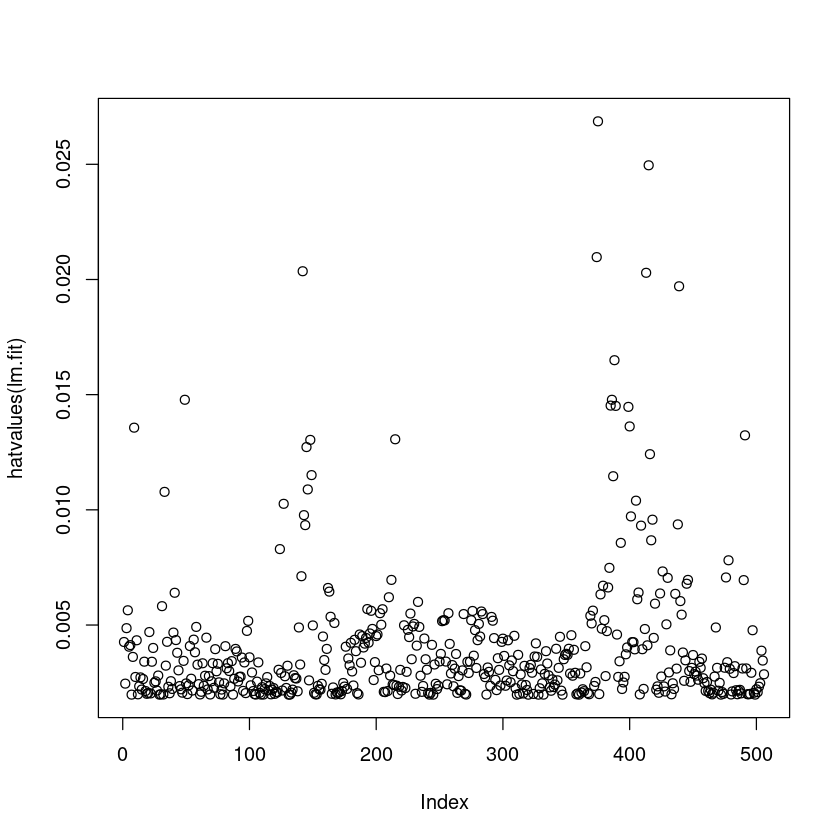

In [17]:
plot(hatvalues(lm.fit))
which.max(hatvalues(lm.fit))

## Regresión Lineal Multiple
Para el uso de una regresión lineal multiple usando mínimos cuadrados, usaremos nuevamente las función *lm()*. La sintaxis *lm(y~x1 + x2 + x3)* es usado para generar un modelo de tres predictores, *x1, x2* y *x3*.

In [18]:
lm.fit = lm(medv~lstat + age, data = Boston)
summary(lm.fit)


Call:
lm(formula = medv ~ lstat + age, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.981  -3.978  -1.283   1.968  23.158 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 33.22276    0.73085  45.458  < 2e-16 ***
lstat       -1.03207    0.04819 -21.416  < 2e-16 ***
age          0.03454    0.01223   2.826  0.00491 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.173 on 503 degrees of freedom
Multiple R-squared:  0.5513,	Adjusted R-squared:  0.5495 
F-statistic:   309 on 2 and 503 DF,  p-value: < 2.2e-16


El conjunto de datos de Boston contiene 13 variables, esto pude ser conveniente para escribir todo para mejorar la regresión usando todos los predictores. Usaremos el siguiente simplificación.

In [19]:
lm.fit = lm(medv~., data = Boston)
summary(lm.fit)


Call:
lm(formula = medv ~ ., data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.595  -2.730  -0.518   1.777  26.199 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.646e+01  5.103e+00   7.144 3.28e-12 ***
crim        -1.080e-01  3.286e-02  -3.287 0.001087 ** 
zn           4.642e-02  1.373e-02   3.382 0.000778 ***
indus        2.056e-02  6.150e-02   0.334 0.738288    
chas         2.687e+00  8.616e-01   3.118 0.001925 ** 
nox         -1.777e+01  3.820e+00  -4.651 4.25e-06 ***
rm           3.810e+00  4.179e-01   9.116  < 2e-16 ***
age          6.922e-04  1.321e-02   0.052 0.958229    
dis         -1.476e+00  1.995e-01  -7.398 6.01e-13 ***
rad          3.060e-01  6.635e-02   4.613 5.07e-06 ***
tax         -1.233e-02  3.760e-03  -3.280 0.001112 ** 
ptratio     -9.527e-01  1.308e-01  -7.283 1.31e-12 ***
black        9.312e-03  2.686e-03   3.467 0.000573 ***
lstat       -5.248e-01  5.072e-02 -10.347  < 2e-16 ***
---
Signif. codes:  0

El paquete *car* no es parte del nucleo de R para ello necesitamos instalar con el siguiente comando *install.packages('car')*

In [21]:
library(car)

Loading required package: carData



In [22]:
vif(lm.fit)

crim       zn    indus     chas      nox       rm      age      dis 
1.792192 2.298758 3.991596 1.073995 4.393720 1.933744 3.100826 3.955945 
     rad      tax  ptratio    black    lstat 
7.484496 9.008554 1.799084 1.348521 2.941491

El la ejecución del comando anterior se observa que la variable *age* tiene un valor muy alto. Para excluir esta variable del predictor ejecutamos la siguiente sintaxis.

In [23]:
lm.fit1 = lm(medv~.-age, data = Boston)

In [24]:
summary(lm.fit1)


Call:
lm(formula = medv ~ . - age, data = Boston)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.6054  -2.7313  -0.5188   1.7601  26.2243 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  36.436927   5.080119   7.172 2.72e-12 ***
crim         -0.108006   0.032832  -3.290 0.001075 ** 
zn            0.046334   0.013613   3.404 0.000719 ***
indus         0.020562   0.061433   0.335 0.737989    
chas          2.689026   0.859598   3.128 0.001863 ** 
nox         -17.713540   3.679308  -4.814 1.97e-06 ***
rm            3.814394   0.408480   9.338  < 2e-16 ***
dis          -1.478612   0.190611  -7.757 5.03e-14 ***
rad           0.305786   0.066089   4.627 4.75e-06 ***
tax          -0.012329   0.003755  -3.283 0.001099 ** 
ptratio      -0.952211   0.130294  -7.308 1.10e-12 ***
black         0.009321   0.002678   3.481 0.000544 ***
lstat        -0.523852   0.047625 -10.999  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1

Alternativamente, podemos usar la función *update()* de la siguiente manera.

In [25]:
lm.fit1 = update(lm.fit, ~.-age)

## Términos de Interacción
Es fácil incluir terminos de interacción en un modelo lineal usando la función *lm()*. La sintaxis *lstst:back* le indica a R incluir un termino de interacción entre *lstat* y *black*. La sintaxis *lstat\*age* minultaneamente inclue *lstat, age* y el término de interacción *lstat X age* como predictores.

In [26]:
summary(lm(medv~lstat*age, data = Boston))


Call:
lm(formula = medv ~ lstat * age, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.806  -4.045  -1.333   2.085  27.552 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 36.0885359  1.4698355  24.553  < 2e-16 ***
lstat       -1.3921168  0.1674555  -8.313 8.78e-16 ***
age         -0.0007209  0.0198792  -0.036   0.9711    
lstat:age    0.0041560  0.0018518   2.244   0.0252 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.149 on 502 degrees of freedom
Multiple R-squared:  0.5557,	Adjusted R-squared:  0.5531 
F-statistic: 209.3 on 3 and 502 DF,  p-value: < 2.2e-16


## Transformación del Predictor No-Lineal
La función *lm()* puede también acomodar transformaciones no lineales de predictores. Por ejemplo, dar un predictor X, we can create a predictión X^2 usando *I(X^2)*. La función *I()* es necesitado ya que el simbolo *^* tiene un significado especial en una formula.


In [27]:
lm.fit2 = lm(medv~lstat + I(lstat^2))
summary(lm.fit2)


Call:
lm(formula = medv ~ lstat + I(lstat^2))

Residuals:
     Min       1Q   Median       3Q      Max 
-15.2834  -3.8313  -0.5295   2.3095  25.4148 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 42.862007   0.872084   49.15   <2e-16 ***
lstat       -2.332821   0.123803  -18.84   <2e-16 ***
I(lstat^2)   0.043547   0.003745   11.63   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.524 on 503 degrees of freedom
Multiple R-squared:  0.6407,	Adjusted R-squared:  0.6393 
F-statistic: 448.5 on 2 and 503 DF,  p-value: < 2.2e-16


El near-zero p-value asociado con el término cuadrático sugiere que lidere ser un mejor modelo. Usamos la función *anova()* para acercarnos a la cuantificación extendida de esta forma el cuadrático es superior que el lineal.

In [28]:
lm.fit = lm(medv~lstat)
anova(lm.fit, lm.fit2)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,504,19472.38,NA,NA,NA,NA
2,503,15347.24,1,4125.138,135.1998,7.630116e-28


El modelo 1 representa un submodelo lineal conteniendo solo un predictor, *lstat*, mientras que el modelo 2 corresponde a un modelo cuadrático largo que tiene dos predictores, *lstat* y *lstat2*. La función *anova()* desarrolla una prueba de hipotesis comparando dos modelos.

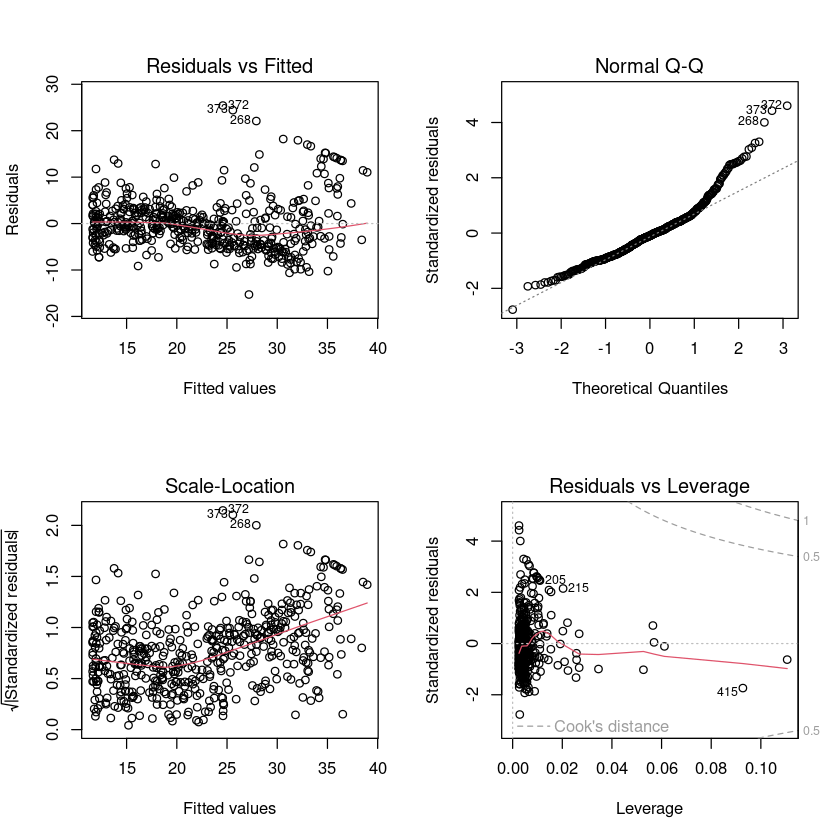

In [29]:
par(mfrow = c(2,2))
plot(lm.fit2)

Para crear un solución cúbica, podemos incluir un predictor de la forma *I(X^3)*. Sin embargo, este acercamiento puede iniciar combirtiendose a un polinómio de alto orden. Un mejor acercamiento involucra el uso de la función *poly()* para crear una función dentro de la función *lm()*.

In [30]:
lm.fit5 = lm(medv~poly(lstat, 5))
summary(lm.fit5)


Call:
lm(formula = medv ~ poly(lstat, 5))

Residuals:
     Min       1Q   Median       3Q      Max 
-13.5433  -3.1039  -0.7052   2.0844  27.1153 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)       22.5328     0.2318  97.197  < 2e-16 ***
poly(lstat, 5)1 -152.4595     5.2148 -29.236  < 2e-16 ***
poly(lstat, 5)2   64.2272     5.2148  12.316  < 2e-16 ***
poly(lstat, 5)3  -27.0511     5.2148  -5.187 3.10e-07 ***
poly(lstat, 5)4   25.4517     5.2148   4.881 1.42e-06 ***
poly(lstat, 5)5  -19.2524     5.2148  -3.692 0.000247 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.215 on 500 degrees of freedom
Multiple R-squared:  0.6817,	Adjusted R-squared:  0.6785 
F-statistic: 214.2 on 5 and 500 DF,  p-value: < 2.2e-16


Esto sugiere incluir un término polinomial adicional, para elevar a un orden 5.

In [31]:
summary(lm(medv~log(rm), data = Boston))


Call:
lm(formula = medv ~ log(rm), data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-19.487  -2.875  -0.104   2.837  39.816 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -76.488      5.028  -15.21   <2e-16 ***
log(rm)       54.055      2.739   19.73   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.915 on 504 degrees of freedom
Multiple R-squared:  0.4358,	Adjusted R-squared:  0.4347 
F-statistic: 389.3 on 1 and 504 DF,  p-value: < 2.2e-16


## Predictores Cualitativos
Ahora examinaremos los datos *Carseats*, el cual es parte de la librería ISLR. Atenderemos predicciones de ventas.

In [32]:
fix(Carseats)
names(Carseats)

[1] "Sales"       "CompPrice"   "Income"      "Advertising" "Population" 
 [6] "Price"       "ShelveLoc"   "Age"         "Education"   "Urban"      
[11] "US"

El dato *Carseats* incluye predictores cualitativos tales como *Shelveloc*, un indicador de la cualidad de localización de shelving. El predictor *Shelveloc* toma tres valores posibles *Bad, Medium* y *Good*.

In [33]:
lm.fit = lm(Sales~.+Income:Advertising + Price:Age, data = Carseats)
summary(lm.fit)


Call:
lm(formula = Sales ~ . + Income:Advertising + Price:Age, data = Carseats)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.9208 -0.7503  0.0177  0.6754  3.3413 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)         6.5755654  1.0087470   6.519 2.22e-10 ***
CompPrice           0.0929371  0.0041183  22.567  < 2e-16 ***
Income              0.0108940  0.0026044   4.183 3.57e-05 ***
Advertising         0.0702462  0.0226091   3.107 0.002030 ** 
Population          0.0001592  0.0003679   0.433 0.665330    
Price              -0.1008064  0.0074399 -13.549  < 2e-16 ***
ShelveLocGood       4.8486762  0.1528378  31.724  < 2e-16 ***
ShelveLocMedium     1.9532620  0.1257682  15.531  < 2e-16 ***
Age                -0.0579466  0.0159506  -3.633 0.000318 ***
Education          -0.0208525  0.0196131  -1.063 0.288361    
UrbanYes            0.1401597  0.1124019   1.247 0.213171    
USYes              -0.1575571  0.1489234  -1.058 0.290729    
Inco

La función *contrasts()* retorna el docigo que R usa para montar las variables

In [34]:
attach(Carseats)
contrasts(ShelveLoc)

,Good,Medium
Bad,0,0
Good,1,0
Medium,0,1


R ha creadoo una variable dummy *ShelveGood* que toma un valor de 1 si el sheving location es bueno, y o en otro caso. También creó un *ShelveLocMedium* que es igual a 1 si el shelving location en medio.

## Escribir Funciones
R tiene muchas funciones muy útiles, y aún asi podemos tener muchas funciones más en las librerías de R. Por ejemplo, nosotro vamos a querer escribir nuestras propias funciones que leean las librerías ISLR y MASS, llamando *LoadLibraries()*